<a href="https://colab.research.google.com/github/Rayjolasun/Portfolio-Projects/blob/main/DASL_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DASL Challenge 3

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://github.com/oladeeayo/FoodHub/raw/main/foodhub-order.csv'

df = pd.read_csv(url)

### Understanding the structure of the data

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Here we can see that the data frame consist of 9 columns that shows different datas both numerical and categorical data about the workings of a set of different restuarants.



### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape

(1898, 9)

This shows that our data frame consist of **1898** rows and **9** columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


It can be deduced that the data type found in this set of data consist of integers, float64 and objects.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [ ]:
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

No null or missing data was found in the data set


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [ ]:
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

The minimum, average and maximum time used in the preparation of a meal once an order is placed is **20mins, 27.37 mins and 35mins** respectively.

### **Question 5:** How many orders are not rated? 

In [ ]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

It can be seen that **736 clients** didn't rate their service

##**Data Cleaning**

In [ ]:
df.restaurant_name.value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
# restaurant names 

df.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

**From the details we have here, some of the restaurant names were not well written. Such as;**

'Big Wong Restaurant \x8c_¤¾Ñ¼' <br>
'Empanada Mama (closed)'<br>
'Chipotle Mexican Grill $1.99 Delivery'<br>
"Joe's Shanghai \x8e_À\x8eü£¾÷´"<br>
'Dirty Bird To Go (archived)'<br>
'CafÌ© China'<br>


We will create two lists, one to capture the old details and the second to capture the clean details.

Then we will iterate and replace the new details inplace of the old details in the general list.

In [ ]:
wrong_restaurant_name = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China']


correct_restaurant_name = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joe's Shanghai", 'Dirty Bird To Go', 'Cafe China']

In [ ]:
# iterating the list of old restaurant names to find their index values
for i, name in enumerate(wrong_restaurant_name):
  
  index_value = df[df['restaurant_name'] == name].index

# iterating the index values and replacing the old name with new name
  for x in index_value:

    df.loc[x,'restaurant_name'] = correct_restaurant_name[i]


# removing minor typing anomalies by applying strip and capitalize using lambda
df['restaurant_name'] = df['restaurant_name'].apply(lambda x : x.strip().capitalize())

In [ ]:
# check to see if the name has been corrected 

df.restaurant_name.unique()

array(['Hangawi', 'Blue ribbon sushi izakaya', 'Cafe habana',
       'Blue ribbon fried chicken', 'Dirty bird to go',
       'Tamarind tribeca', 'The meatball shop', 'Barbounia',
       'Anjappar chettinad', 'Bukhara grill', 'Big wong restaurant',
       'Empanada mama', 'Pylos', "Lucky's famous burgers", 'Shake shack',
       'Sushi of gari', 'Redfarm hudson', 'Blue ribbon sushi',
       'Five guys burgers and fries', 'Tortaria', 'Cafe mogador',
       'Otto enoteca pizzeria', 'Vezzo thin crust pizza',
       'Sushi of gari 46', 'The kati roll company', 'Klong',
       '5 napkin burger', 'Tao', 'Parm', 'Sushi samba',
       'Haru gramercy park', 'Chipotle mexican grill', 'Redfarm broadway',
       'Cafeteria', 'Dumont burger', "Sarabeth's east",
       'Hill country fried chicken', 'Bistango', "Jack's wife freda",
       "Mamoun's falafel", 'Prosperity dumpling',
       'Blue ribbon sushi bar & grill', 'Westville hudson',
       'Blue ribbon brooklyn', 'Nobu next door', 'Osteria morin

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID

In [ ]:
df.order_id.nunique()

1898

It was deduced that the Order_id is the primary key as all the IDs are Unique so we added up to see the total orders recorded in the set and we got 1898 orders

#### Customer ID

In [ ]:
df.customer_id.nunique()

1200

To understand the number of clients that ordered from the resturants during the period of the recording we used the unique function which shows that 1200 clients had patronised the restuarants

#### Restaurant name

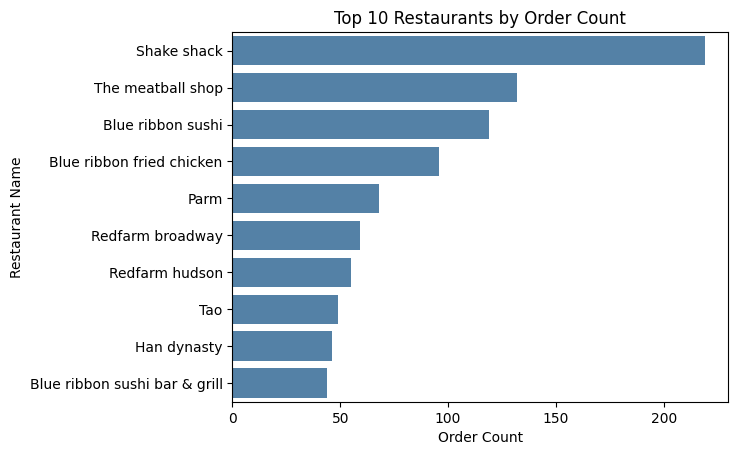

In [ ]:
restaurant = df[['restaurant_name', 'order_id']].groupby('restaurant_name').agg('count').sort_values('order_id', ascending=False).reset_index()

# Set the color for all bars
bar_color = 'steelblue'

# Create bar chart
sns.barplot(data=restaurant.head(10), x="order_id", y="restaurant_name", color=bar_color)

# Set the plot title and labels
plt.title('Top 10 Restaurants by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Restaurant Name')

plt.show()

Arranging the restuarant name using the count makes it easier to see the top 10 restuarants and we also can see that Shake shack resturant is having a great sale record as compared to the orders. nice one

#### Cuisine type

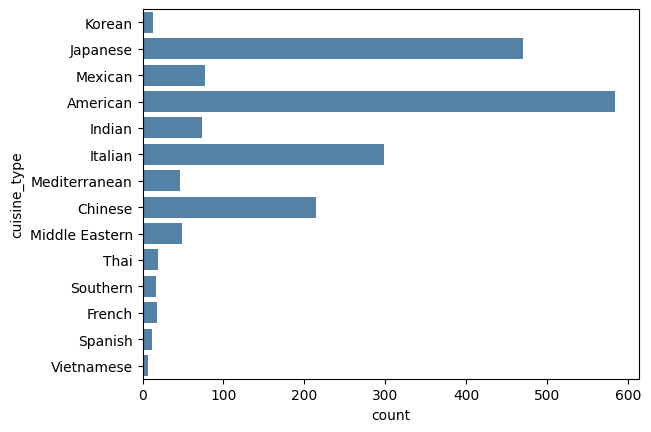

In [ ]:
sns.countplot(y = 'cuisine_type', palette=['steelblue'], data = df)

plt.show()

This gave us an insight of the cuisine that are heavily bought we can see here that the American cuisine is the highest followed by the Japanes Cuisine and then the Italian Cuisine

#### Cost of the order

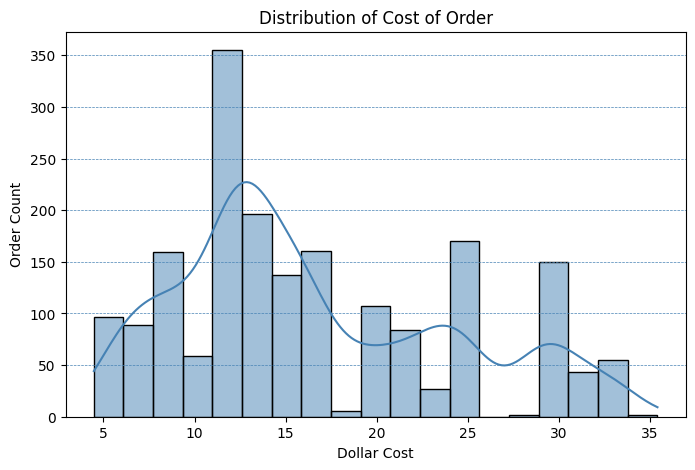

In [ ]:
#checking histogram for cost of order
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='cost_of_the_order', kde=True, color='steelblue')
plt.xlabel('Dollar Cost')
plt.ylabel('Order Count')
plt.title('Distribution of Cost of Order')
plt.grid(axis='y', color='steelblue', linestyle='--', linewidth=0.5)
plt.show()

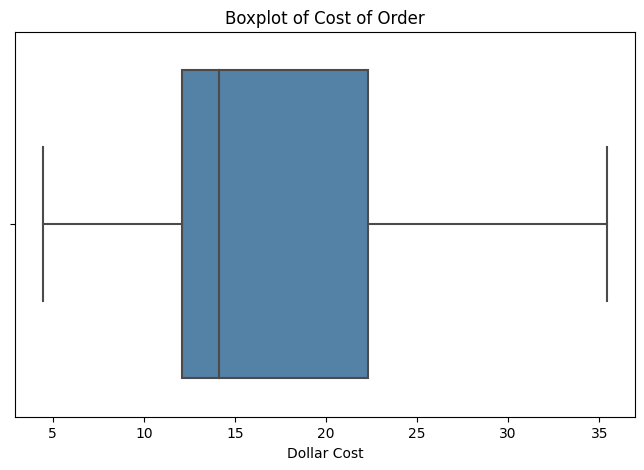

In [ ]:
#checking boxplot for cost of order
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='cost_of_the_order', color='steelblue')
plt.xlabel('Dollar Cost')
plt.title('Boxplot of Cost of Order')
plt.show()

We noticed that there don't seem to be any anomalies in the dataset. Also, the KDE line in the histogram and boxplot shows rightward skewness.

#### Day of the week

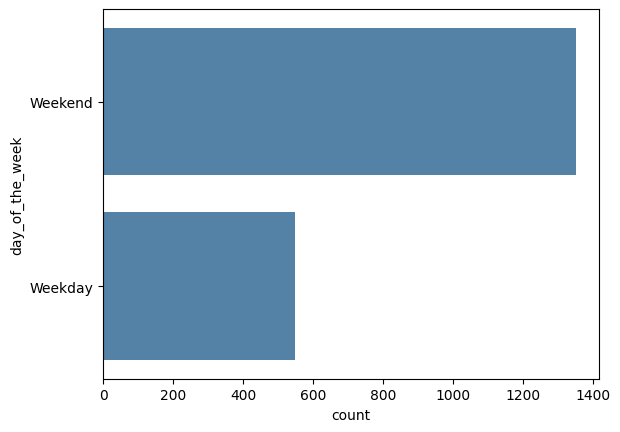

In [ ]:
sns.countplot(y = 'day_of_the_week', palette=['steelblue'], data = df)

plt.show()

In trying to understand this field we came to the conclusion that Weekends record the highest number of orders which inturn relates to sale. 

In [ ]:
# percentage distribution of the days of the week using value count

per_dow = df.day_of_the_week.value_counts(1)*100

print (round(per_dow,2))

Weekend    71.18
Weekday    28.82
Name: day_of_the_week, dtype: float64


In order to understand the day_of_the_week field in more details, the percentage value was gotten and we can deduce as weekend = **71.18%** and that weekend is our **"HOT SALES PERIOD"**

#### Rating

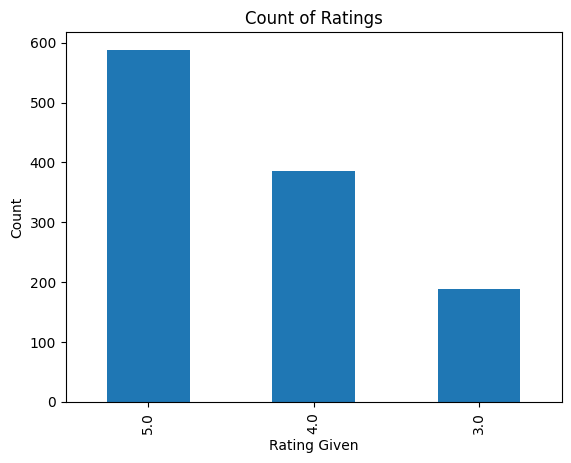

In [ ]:
df['rating_new'] = df['rating'].replace('Not given', np.nan).astype(float)

df.rating_new.value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Rating Given')
plt.title('Count of Ratings')

plt.show()

The **Not given** was removed as it wasn't actually a rating, but with this we can see that our rating 5 stars is the highest. We are definately doing it right 

#### Food Preparation time

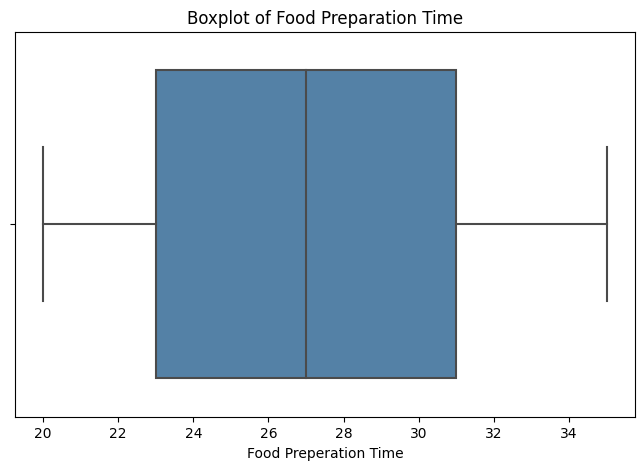

In [ ]:
# boxplot for food preparation time
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='food_preparation_time', color='steelblue')
plt.xlabel('Food Preperation Time')
plt.title('Boxplot of Food Preparation Time')
plt.show()

This simply shows that the average food preparation time is 27.3mins

#### Delivery time

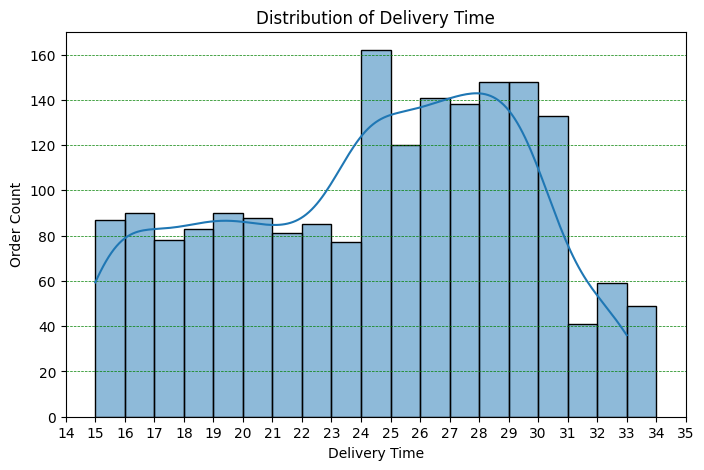

In [ ]:
# Analysing delivery time

# checking histogram of delivery time to check distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='delivery_time', binrange=(15,34), binwidth=1, kde=True)
plt.xlabel('Delivery Time')
plt.xticks(np.arange(14,36,1))
plt.ylabel('Order Count')
plt.title('Distribution of Delivery Time')
plt.grid(axis = 'y', color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()


In understanding the delivery time, it can be gotten that the delivery men use an average of 24.16mins to deliver the food.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

In [ ]:
df.restaurant_name.value_counts().head(5)

Shake shack                  219
The meatball shop            132
Blue ribbon sushi            119
Blue ribbon fried chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

These restuarants can be refered to as the big 5 with **Shake Shake** leading with **219** orders followed by **The Meatball Shop** with **132** orders, the **Blue Ribon sushi** with **119** orders, **Blue ribbon fried Chicken** with **96** orders and lastly **Parm** with **68** orders.

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
df[df.day_of_the_week == 'Weekend'].cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

Weekends are hot cakes we already know but the **American Cuisine** is the meal that is mostly ordered on weekends.

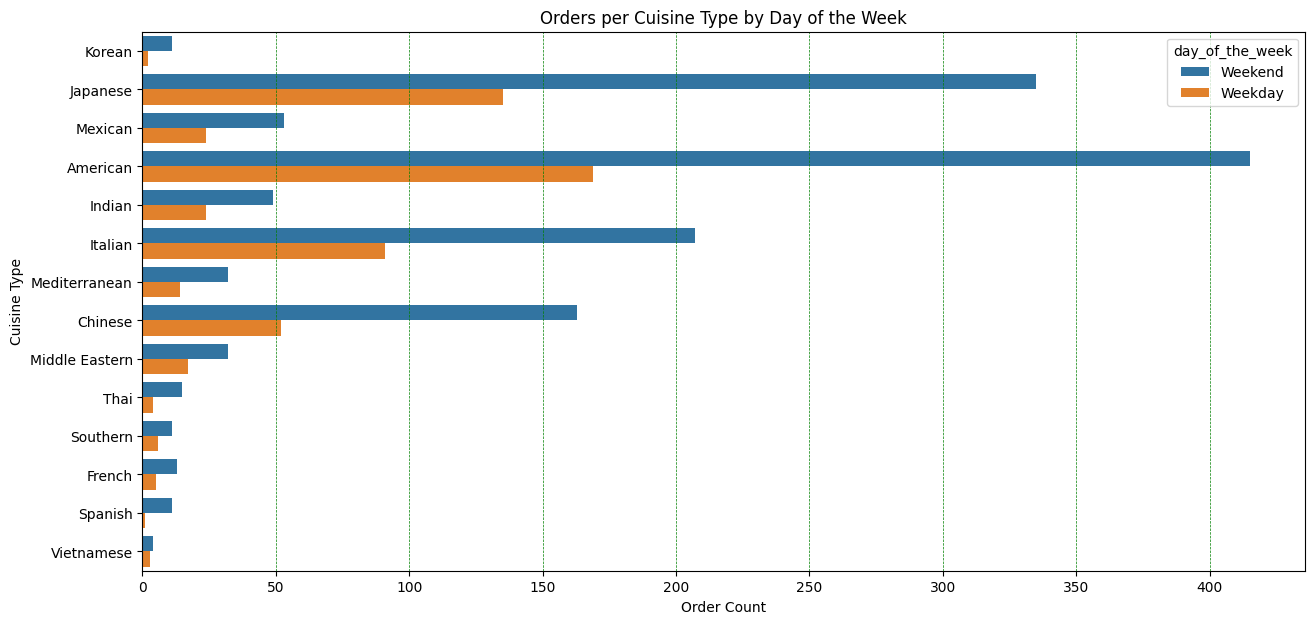

In [ ]:
# using barplot to display distribution of cuisine type
plt.figure(figsize=(15,7))
sns.countplot(data=df, y='cuisine_type', hue='day_of_the_week')
plt.xlabel('Order Count')
plt.ylabel('Cuisine Type')
plt.title('Orders per Cuisine Type by Day of the Week')
plt.grid(axis = 'x', color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

We went a little further to understand each cuisine types per the day_of_the_week which shows that all the cuisine types have more orders on weekends than weekdays.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
num_orders_greater_than_20 = (df['cost_of_the_order'] > 20).sum()

per_cost_over_20 = (num_orders_greater_than_20 / df.cost_of_the_order.count()) * 100

print('The percentage of the orders that cost more than 20 dollars = ',
      round(per_cost_over_20, 2)
)

The percentage of the orders that cost more than 20 dollars =  29.24


The percentage of the orders that cost more than 20 dollars = **29.24%**

### **Question 10**: What is the mean order delivery time?

In [ ]:
print('The mean order delivery time = ',
      round(df.delivery_time.mean(),2)
)

The mean order delivery time =  24.16


The mean order delivery time =  **24.16mins**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
top_customers = df.groupby('customer_id')['order_id'].count().nlargest(3)
print(top_customers)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


The **top 3** most frequent customers are **52832 with 13 orders**, **47440 with 10 orders** and **83287 with 9 orders**. These are the customers that will recieve the 20% discount vouchers from the company.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

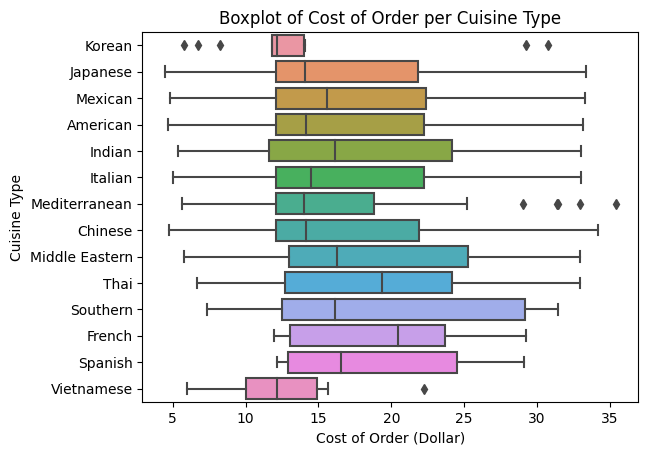

In [ ]:
sns.boxplot(x='cost_of_the_order', y='cuisine_type', data=df)
plt.xlabel('Cost of Order (Dollar)')
plt.ylabel('Cuisine Type')
plt.title('Boxplot of Cost of Order per Cuisine Type')
plt.show()

We observed that most cuisines have some degree of pricing skew, but a handful have extreme cases, such Korean, Mediterranean, and Vietnamese.

#### Cuisine vs Food Preparation time

In [ ]:
grouped_df = df.groupby('cuisine_type')['food_preparation_time'].mean().reset_index()
grouped_df = grouped_df.sort_values(by='food_preparation_time', ascending=False)
print(grouped_df)

      cuisine_type  food_preparation_time
10        Southern              27.588235
1          Chinese              27.511628
5         Japanese              27.510638
4          Italian              27.483221
0         American              27.440068
12            Thai              27.315789
3           Indian              27.109589
7    Mediterranean              27.000000
11         Spanish              26.916667
2           French              26.888889
8          Mexican              26.727273
9   Middle Eastern              26.673469
13      Vietnamese              25.714286
6           Korean              25.461538


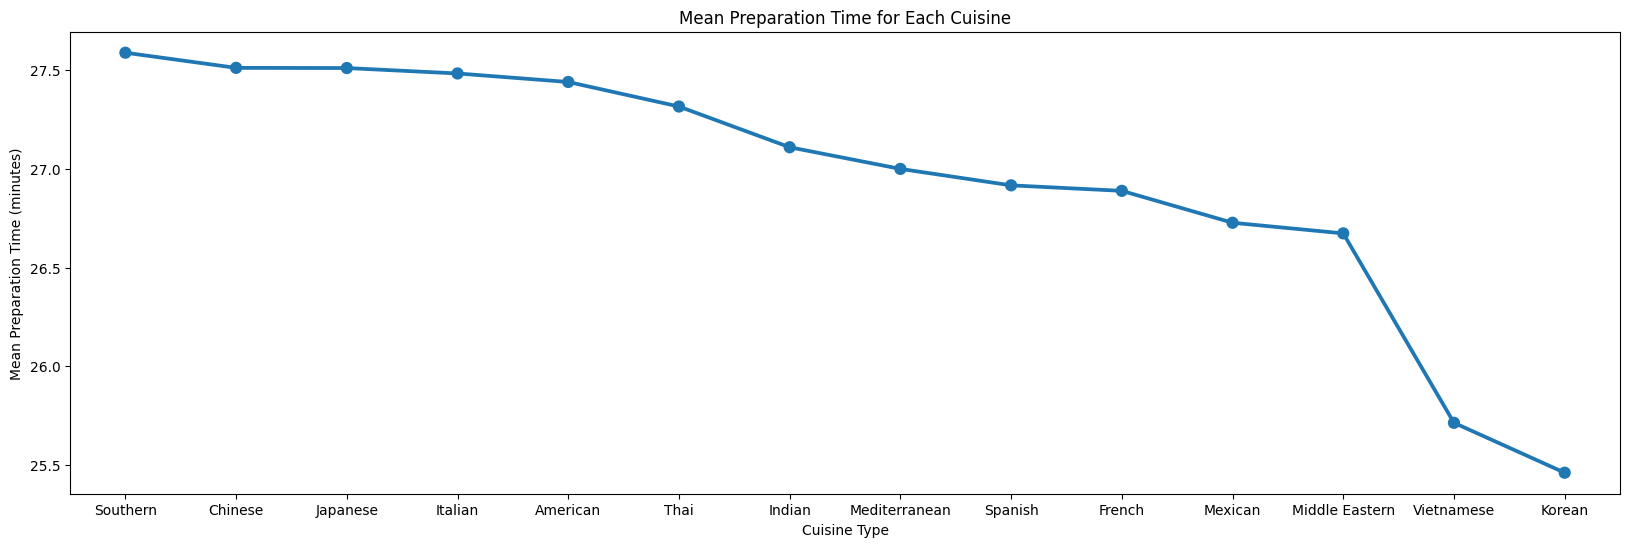

In [ ]:
plt.figure(figsize=(20, 6))
sns.pointplot(x='cuisine_type', y='food_preparation_time', data=grouped_df)
plt.xlabel('Cuisine Type')
plt.ylabel('Mean Preparation Time (minutes)')
plt.title('Mean Preparation Time for Each Cuisine')
plt.show()

#### Day of the Week vs Delivery time

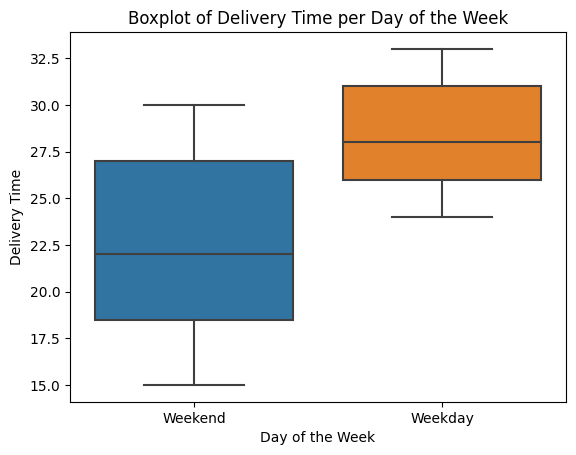

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.title('Boxplot of Delivery Time per Day of the Week')
plt.show()

Delivery time is faster on weekend than on weekdays

#### Day of the Week vs Food Preparation time

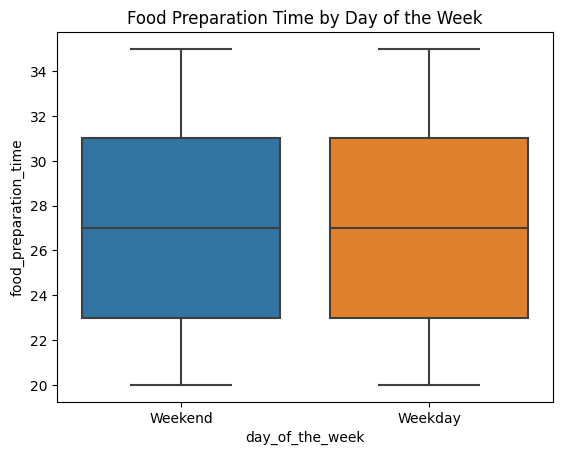

In [ ]:
# Box plot using seaborn
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time') 
plt.title('Food Preparation Time by Day of the Week')
plt.show()

Food preparation is the same time irrespective if its weekend or weekday

#### Rating vs Delivery time

In [ ]:
# create a scatter plot
plt.scatter(data=df['delivery_time'], data=df['rating'])

# set axis labels and title
plt.xlabel('Delivery Time')
plt.ylabel('Rating')
plt.title('Rating vs Delivery Time')

# show the plot
plt.show()

#### Rating vs Cost of the order

#### Correlation among variables

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Create a data set of Restaurants with a consideration of mean rating greater than 4. The rating eliminates all unrated rows in calculating the mean
avg_rating = df[['restaurant_name','rating_new']][df['rating_new']!= 0].groupby('restaurant_name').mean()> 4  
# reset the index
avg_rating.reset_index(inplace=True)

In [ ]:
# Create a data set of Restaurants with a consideration of count of rating greate than 50.Equally in this case unrated orders are not considered.
rating_counts = df[['restaurant_name','rating_new']][df['rating_new']!= 0].groupby('restaurant_name').count()> 50
# reset the index
rating_counts.reset_index(inplace=True)

In [ ]:
# Create a set of Restaurants that meet both conditions using merge
qualified_restaurants = pd.merge(rating_counts[rating_counts['rating_new']== True], avg_rating[avg_rating['rating_new']== True],on ='restaurant_name')

# Return the set of qualified restaurants only
qualified_restaurants

,restaurant_name,rating_new_x,rating_new_y
0,Blue ribbon fried chicken,True,True
1,Blue ribbon sushi,True,True
2,Shake shack,True,True
3,The meatball shop,True,True


The restuarants listed above made the requirements for the promotional offers ... well done

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Calculate the amount charged by the company for orders greater than $20
df['charged_amount_20'] = df['cost_of_the_order'].where(df['cost_of_the_order'] > 20, 0) * 0.25


# Calculate the amount charged by the company for orders greater than $5 but less than $20
df['charged_amount_15'] = df['cost_of_the_order'].where((df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] < 20), 0) * 0.15


# Calculate the total amount charged
total_charged_amount = df['charged_amount_20'].sum() + df['charged_amount_15'].sum()

# Print the total amount charged
print(round(total_charged_amount, 2))

6166.3


The net revenue generated across all company orders is: $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
total_orders = len(df)
orders_more_than_60_min = len(df[(df['food_preparation_time'] + df['delivery_time']) > 60])
percentage = (orders_more_than_60_min / total_orders) * 100

print("Percentage of orders taking more than 60 minutes:", round(percentage,2))




Percentage of orders taking more than 60 minutes: 10.54


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
avg_del_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print(avg_del_time)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


The average delivery time on weekends is lower than the weekdays

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

In Conclusion

**From our Observation:**
1.	The rating system is poor as the ‘Not Rated’ seems to be the highest 
2.	The American, Japanese, Italian and Chinese cuisine are the top requested 
3.	Sales on weekdays are really poor compared to weekend 
4.	If the average delivery time is 24mins and the average food preparation time is 27mins  then it takes about 51mins on the average to deliver 
5.	Korean cuisine is the fastest to prepare according to the preparation average followed by the Vietnamese
6.  The delivery time is high during the weekdays maybe due to work traffic


**Recommendation**
1.	Offers can be made on weekdays to increase the sales or order rate
2.	Increment of the ratings are needed this could be through customer representative follow ups or a simple follow up email requesting a feedback
3.	Korean and Vietnamese foods should be promoted to increase sales since the preparation time is shorter, it will in return lead to a shorter order to delivery time
4.	Food preparation should be faster on weekdays to match the long delivery time so as that the client gets their food on time